In [6]:
import numpy as np
import pickle
import glob
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import datetime
import cartopy.crs as ccrs
from matplotlib import gridspec
import cartopy
import warnings
warnings.filterwarnings("ignore")

### intercomparison long interp CS2S3_CPOM

#### compare annual mean for full seasons

In [7]:
datapath = '/Users/carmennab/Dropbox/OI_PolarSnow/freeboard_daily_interpolated/daily_numpys/CS2S3_CPOM/long_interpolation'

seasons=['2018-2019','2019-2020']

k=0

for season in seasons:
    
    if season == '2018-2019':
        months = ['2018/12','2019/01','2019/02','2019/03','2019/04']
        days = [31,31,28,31,30]
    elif season == '2019-2020':
        months = ['2019/12','2020/01','2020/02','2020/03','2020/04']
        days = [31,31,29,31,30]
        
    ell_x_smth_all=[]
    ell_y_smth_all=[]
    sf2_smth_all=[]
    sn2_smth_all=[]

    for month in months:
        dates = month.split('/')
        for day in range(days[k]):
            date = dates[0]+dates[1]+str('%02d'%(day+1))
            try:
                f = open(datapath+'/FBinterp_'+str(date)+'_50km_9dayT_hindcast_300kmiter_nonzeroMatern.pkl','rb')
                data = pickle.load(f)
                f.close()

                #create empty variables
                ell_x_smth=[]
                ell_y_smth=[]
                sf2_smth=[]
                sn2_smth=[]

                #extract data from pickles
                ell_x_smth.extend(data[date+'_ell_x_smth']) 
                ell_y_smth.extend(data[date+'_ell_y_smth']) 
                sf2_smth.extend(data[date+'_sf2_smth']) 
                sn2_smth.extend(data[date+'_sn2_smth']) 

                #combine all days into yearly variable
                ell_x_smth_all.append(ell_x_smth[:])
                ell_y_smth_all.append(ell_y_smth[:])
                sf2_smth_all.append(sf2_smth[:])
                sn2_smth_all.append(sn2_smth[:])
            
            except FileNotFoundError:
                pass
        
    #calculate and print annual means
    if season == '2018-2019':
        ell_x_smth_all_mean_2018_2019 = (np.nanmean(ell_x_smth_all,0))/1000
        ell_y_smth_all_mean_2018_2019 = (np.nanmean(ell_y_smth_all,0))/1000
        sf2_smth_all_mean_2018_2019 = np.nanmean(sf2_smth_all,0)
        sn2_smth_all_mean_2018_2019 = np.nanmean(sn2_smth_all,0)
    elif season == '2019-2020':
        ell_x_smth_all_mean_2019_2020 = (np.nanmean(ell_x_smth_all,0))/1000
        ell_y_smth_all_mean_2019_2020 = (np.nanmean(ell_y_smth_all,0))/1000
        sf2_smth_all_mean_2019_2020 = np.nanmean(sf2_smth_all,0)
        sn2_smth_all_mean_2019_2020 = np.nanmean(sn2_smth_all,0)

In [8]:
diff_ell_x = np.abs(ell_x_smth_all_mean_2019_2020) - np.abs(ell_x_smth_all_mean_2018_2019)
diff_ell_y = np.abs(ell_y_smth_all_mean_2019_2020) - np.abs(ell_y_smth_all_mean_2018_2019)
diff_sf2 = np.abs(sf2_smth_all_mean_2019_2020) - np.abs(sf2_smth_all_mean_2018_2019)
diff_sn2 = np.abs(sn2_smth_all_mean_2019_2020) - np.abs(sn2_smth_all_mean_2018_2019)

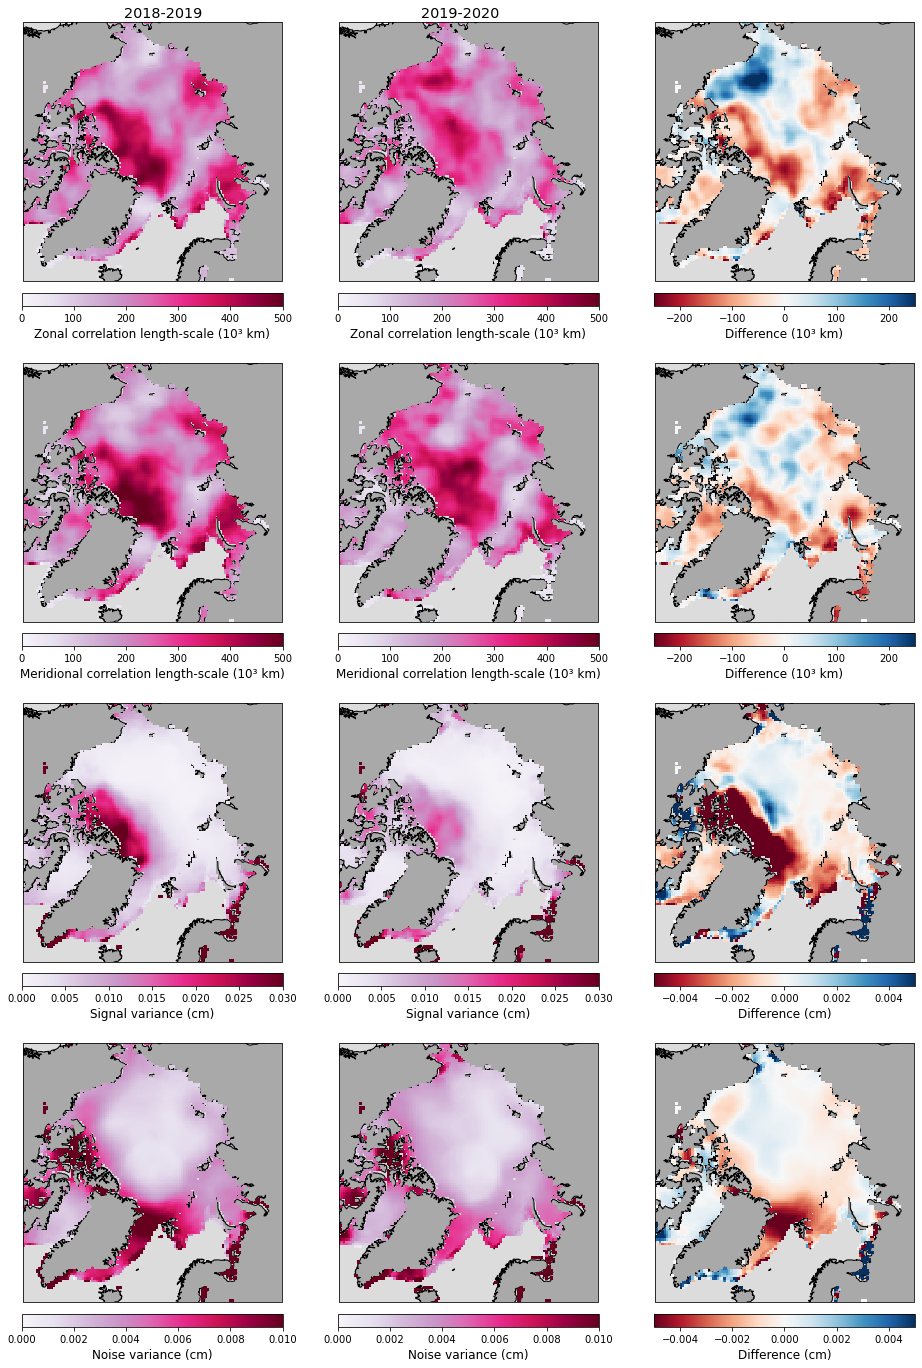

In [15]:
lats = np.load('/Users/carmennab/Dropbox/OI_PolarSnow/auxiliary/lats.npy')
lons = np.load('/Users/carmennab/Dropbox/OI_PolarSnow/auxiliary/lons.npy')

data = [ell_x_smth_all_mean_2018_2019,ell_x_smth_all_mean_2019_2020,diff_ell_x,
        ell_y_smth_all_mean_2018_2019,ell_y_smth_all_mean_2019_2020,diff_ell_y,
        sf2_smth_all_mean_2018_2019,sf2_smth_all_mean_2019_2020,diff_sf2,
        sn2_smth_all_mean_2018_2019,sn2_smth_all_mean_2019_2020,diff_sn2]
labels = ['Zonal correlation length-scale (10\u00b3 km)','Zonal correlation length-scale (10\u00b3 km)','Difference (10\u00b3 km)',
          'Meridional correlation length-scale (10\u00b3 km)','Meridional correlation length-scale (10\u00b3 km)','Difference (10\u00b3 km)',
          'Signal variance (cm)','Signal variance (cm)','Difference (cm)', 'Noise variance (cm)','Noise variance (cm)','Difference (cm)']

fig = plt.figure(figsize=(17,24))
spec = gridspec.GridSpec(ncols=3, nrows=4,hspace=0.2,wspace=0.)

for counter, ax in enumerate(data):
    fb = data[counter]
    ax = fig.add_subplot(spec[counter],projection=ccrs.NorthPolarStereo())
    ax.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
    ax.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
    ax.coastlines()
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    if counter in (0,1,3,4):
        p_map = ax.pcolormesh(lons,lats,fb[:-1,:-1],cmap='PuRd',vmin=0,vmax=500,transform=ccrs.PlateCarree())
    elif counter in (2,5):
        p_map = ax.pcolormesh(lons,lats,fb[:-1,:-1],cmap='RdBu',vmin=-250,vmax=250,transform=ccrs.PlateCarree())
    elif counter in (6,7):
        p_map = ax.pcolormesh(lons,lats,fb[:-1,:-1],cmap='PuRd',vmin=0,vmax=0.03,transform=ccrs.PlateCarree())
    elif counter in (8,11):
        p_map = ax.pcolormesh(lons,lats,fb[:-1,:-1],cmap='RdBu',vmin=-0.005,vmax=0.005,transform=ccrs.PlateCarree())
    elif counter in (9,10):
        p_map = ax.pcolormesh(lons,lats,fb[:-1,:-1],cmap='PuRd',vmin=0,vmax=0.01,transform=ccrs.PlateCarree())
    a = plt.colorbar(p_map,location="bottom",fraction=0.046, pad=0.04) 
    a.set_label(labels[counter],fontsize='large')
plt.annotate('2018-2019',xy=(-1.75,5),va='top',ha='right',xycoords='axes fraction',color='k', fontsize = 'x-large')
plt.annotate('2019-2020',xy=(-0.6,5),va='top',ha='right',xycoords='axes fraction',color='k', fontsize = 'x-large')

plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Snow Interpolated Freeboards/supp_figs/hyperparameters.png',bbox_inches = "tight")

### compare long interp to short interp fb results CS2S3_CPOM

In [16]:
days = np.arange(0,213)
dates = [datetime.date(2019,10,1)+datetime.timedelta(days=np.int(days)) for days in days]

for day in days:
    date = dates[day].strftime('%Y%m%d')
    try:
        f = open('/Users/carmennab/Dropbox/OI_PolarSnow/freeboard_daily_interpolated/daily_numpys/CS2S3_CPOM/long_interpolation/FBinterp_'+date+'_50km_9dayT_hindcast_300kmiter_nonzeroMatern.pkl','rb')
        data = pickle.load(f)
        f.close()
        long=[]
        long.extend(data[date+'_interp']) 
                
        short = np.load('/Users/carmennab/Dropbox/OI_PolarSnow/freeboard_daily_interpolated/daily_numpys/CS2S3_CPOM/MERGE/FB_interp_'+season+'_50km_'+date+'.npy')

    except:
        pass

In [17]:
season='2019-2020'
date='20191012'

## long interp load data 
datapath = '/Users/carmennab/Dropbox/OI_PolarSnow/freeboard_daily_interpolated/daily_numpys/CS2S3_CPOM/long_interpolation'
f = open(datapath+'/FBinterp_'+date+'_50km_9dayT_hindcast_300kmiter_nonzeroMatern.pkl','rb')
data = pickle.load(f)
f.close()
long_interp_one=[]
long_interp_one.extend(data[date+'_interp']) 

## short interp load data
datapath='/Users/carmennab/Dropbox/OI_PolarSnow/freeboard_daily_interpolated/daily_numpys/CS2S3_CPOM/MERGE/'
short_interp_one = np.load(datapath+'FB_interp_'+season+'_50km_'+date+'.npy')

season='2019-2020'
date='20200321'

## long interp load data 
datapath = '/Users/carmennab/Dropbox/OI_PolarSnow/freeboard_daily_interpolated/daily_numpys/CS2S3_CPOM/long_interpolation'
f = open(datapath+'/FBinterp_'+date+'_50km_9dayT_hindcast_300kmiter_nonzeroMatern.pkl','rb')
data = pickle.load(f)
f.close()
long_interp_two=[]
long_interp_two.extend(data[date+'_interp']) 

## short interp load data
datapath='/Users/carmennab/Dropbox/OI_PolarSnow/freeboard_daily_interpolated/daily_numpys/CS2S3_CPOM/MERGE/'
short_interp_two = np.load(datapath+'FB_interp_'+season+'_50km_'+date+'.npy')

In [18]:
diff_one = np.abs(long_interp_one) - np.abs(short_interp_one)
diff_two = np.abs(long_interp_two) - np.abs(short_interp_two)

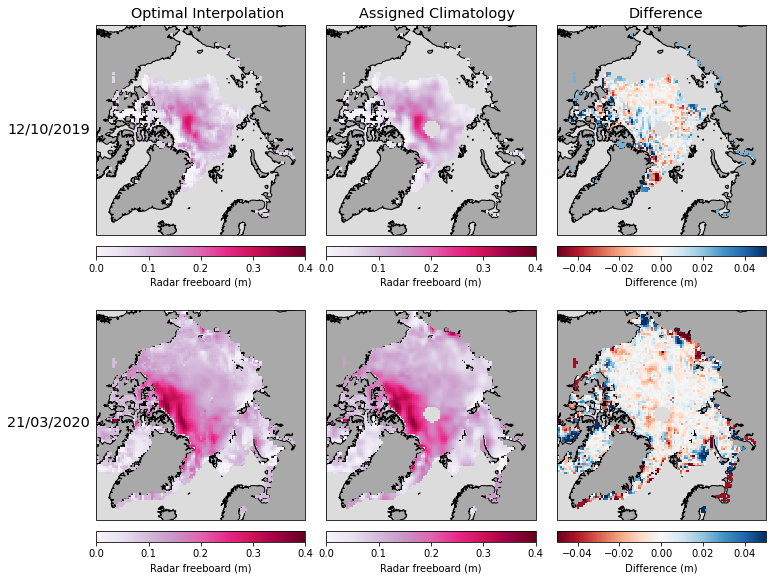

In [23]:
data = [long_interp_one,short_interp_one,diff_one,long_interp_two,short_interp_two,diff_two]

fig = plt.figure(figsize=(12,10.5))
spec = gridspec.GridSpec(ncols=3, nrows=2,wspace=0.1,hspace=0.)

for counter, ax in enumerate(data):
    fb = np.asarray(data[counter])
    ax = fig.add_subplot(spec[counter],projection=ccrs.NorthPolarStereo())
    ax.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
    ax.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
    ax.coastlines()
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    if counter in (0,1,3,4):
        p_map = ax.pcolormesh(lons,lats,fb[:-1,:-1],cmap='PuRd',vmin=0,vmax=0.4,transform=ccrs.PlateCarree())
    else:
        p_map = ax.pcolormesh(lons,lats,fb[:-1,:-1],cmap='RdBu',vmin=-0.05,vmax=0.05,transform=ccrs.PlateCarree())
    a = plt.colorbar(p_map,location="bottom",fraction=0.046, pad=0.04) 
    if counter in (0,1,3,4):
        a.set_label('Radar freeboard (m)',fontsize='medium')
    else:
        a.set_label('Difference (m)',fontsize='medium')
plt.annotate('Optimal Interpolation',xy=(-1.3,2.45),va='top',ha='right',xycoords='axes fraction',color='k', fontsize = 'x-large')
plt.annotate('Assigned Climatology',xy=(-0.2,2.45),va='top',ha='right',xycoords='axes fraction',color='k', fontsize = 'x-large')
plt.annotate('Difference',xy=(0.7,2.45),va='top',ha='right',xycoords='axes fraction',color='k', fontsize = 'x-large')  
plt.annotate('12/10/2019',xy=(-2.23,1.9),va='top',ha='right',xycoords='axes fraction',color='k', fontsize = 'x-large')
plt.annotate('21/03/2020',xy=(-2.23,0.5),va='top',ha='right',xycoords='axes fraction',color='k', fontsize = 'x-large')

plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Snow Interpolated Freeboards/supp_figs/long_interp.png',bbox_inches = "tight")